In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = 'merged_country_energy_predictions.csv'
data = pd.read_csv(file_path)

data.head()

,Country_Code,average_temperature,average_radiation,temperature_fluctuation,predicted_avg_temp,predicted_avg_radiation,avg_production_all_energy,avg_production_renewables,avg_production_non_renewables,avg_CO2_emissions,GDP,Population,predicted_avg_production_renewables,predicted_avg_production_non_renewables,predicted_avg_CO2_emissions,predicted_GDP,predicted_Population
0,SK,8.79,158.47,8.63,9.41,162.87,0.17,0.23,0.03,23.03,181.39,5455.08,0.17,0.03,33.99,162.50,5429.12
1,PL,8.56,144.77,8.47,9.21,149.54,1.74,0.21,2.40,207.72,1217.99,37963.62,0.03,3.62,350.29,675.91,38361.63
2,LU,9.26,151.12,6.88,9.87,155.14,0.00,0.00,0.00,7.40,66.22,621.53,0.00,0.00,8.22,34.79,421.24
3,FI,4.23,113.14,9.11,4.93,116.91,0.34,0.51,0.00,31.73,253.00,5522.52,0.41,0.00,50.95,160.82,5121.76
4,CZ,8.51,153.71,8.21,9.18,158.83,0.77,0.40,0.76,70.58,410.04,10677.38,0.20,0.77,105.20,226.52,10297.06


In [5]:
# Create a copy of the data to avoid altering the original dataset
data_normalized = data.copy()

# Normalize the columns related to renewable energy production, CO2 emissions, GDP
columns_to_normalize = [
    'avg_production_renewables', 'predicted_avg_production_renewables', 
    'avg_CO2_emissions', 'predicted_avg_CO2_emissions', 'GDP', 'predicted_GDP'
]

In [6]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization
data_normalized[columns_to_normalize] = scaler.fit_transform(data_normalized[columns_to_normalize])

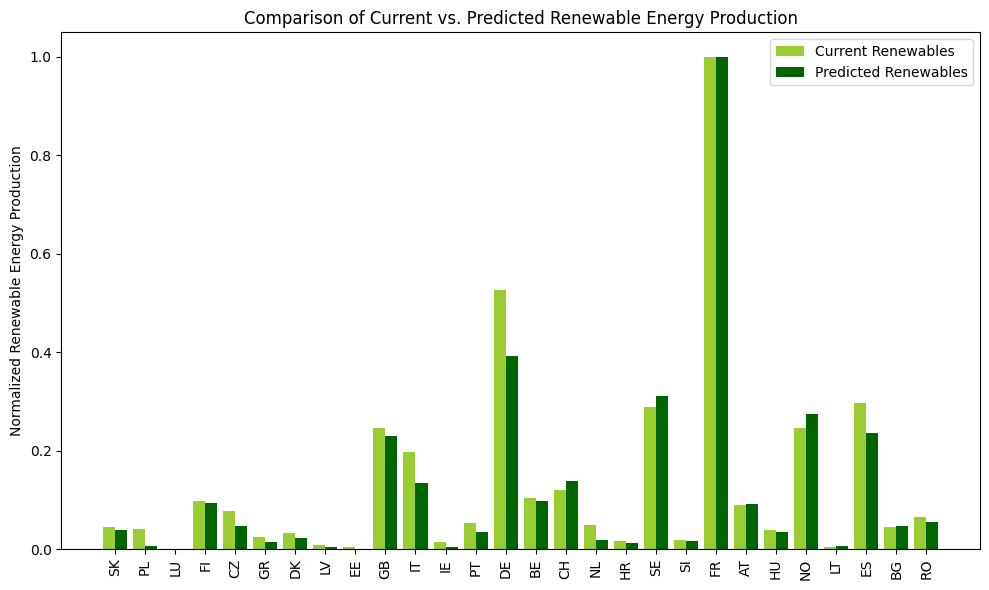

In [15]:
# Plot 1: Comparison of Current vs. Predicted Renewable Energy Production

plt.figure(figsize=(10,6))
# Set the bar width
bar_width = 0.4

# Create a range for x-axis based on the number of countries
x_indexes = range(len(data_normalized['Country_Code']))

# Plot side-by-side bars
plt.bar([x - bar_width/2 for x in x_indexes], data_normalized['avg_production_renewables'], width=bar_width, color='yellowgreen', label='Current Renewables')
plt.bar([x + bar_width/2 for x in x_indexes], data_normalized['predicted_avg_production_renewables'], width=bar_width, color='darkgreen', label='Predicted Renewables')

# Add labels and formatting
plt.xticks(ticks=x_indexes, labels=data_normalized['Country_Code'], rotation=90)
plt.title('Comparison of Current vs. Predicted Renewable Energy Production')
plt.ylabel('Normalized Renewable Energy Production')
plt.legend()
plt.tight_layout()
plt.show()

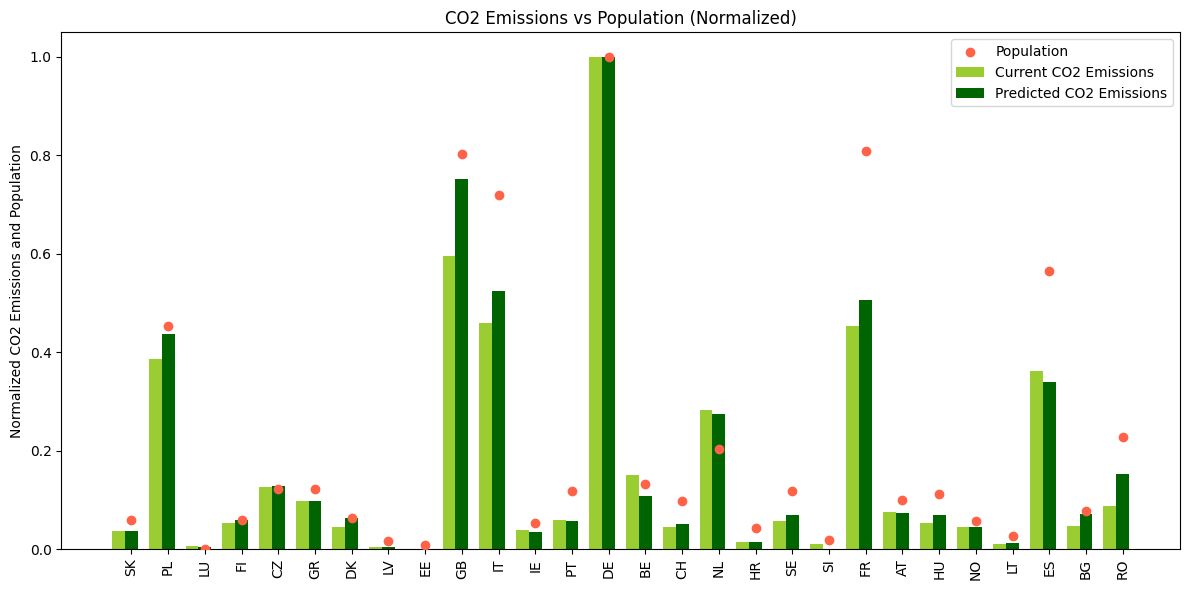

In [18]:
# Plot 2: Current CO2 Emissions vs. Predicted CO2 Emissions in corelation to Population

# Create a copy of the normalized data with population normalized for better scaling
data_normalized['Population_normalized'] = MinMaxScaler().fit_transform(data_normalized[['Population']])

plt.figure(figsize=(12,6))
bar_width = 0.35

# Create a range for x-axis based on the number of countries
x_indexes = range(len(data_normalized['Country_Code']))

# Plot side-by-side bars for CO2 emissions
plt.bar([x - bar_width for x in x_indexes], data_normalized['avg_CO2_emissions'], width=bar_width, color='yellowgreen', label='Current CO2 Emissions')
plt.bar([x for x in x_indexes], data_normalized['predicted_avg_CO2_emissions'], width=bar_width, color='darkgreen', label='Predicted CO2 Emissions')

# Add normalized population as a scatter plot on the same axis
plt.scatter(x_indexes, data_normalized['Population_normalized'], color='tomato', label='Population', zorder=5, marker='o')


# Add labels and formatting
plt.xticks(ticks=x_indexes, labels=data_normalized['Country_Code'], rotation=90)
plt.title('CO2 Emissions vs Population (Normalized)')
plt.ylabel('Normalized CO2 Emissions and Population')
plt.legend()
plt.tight_layout()
plt.show()

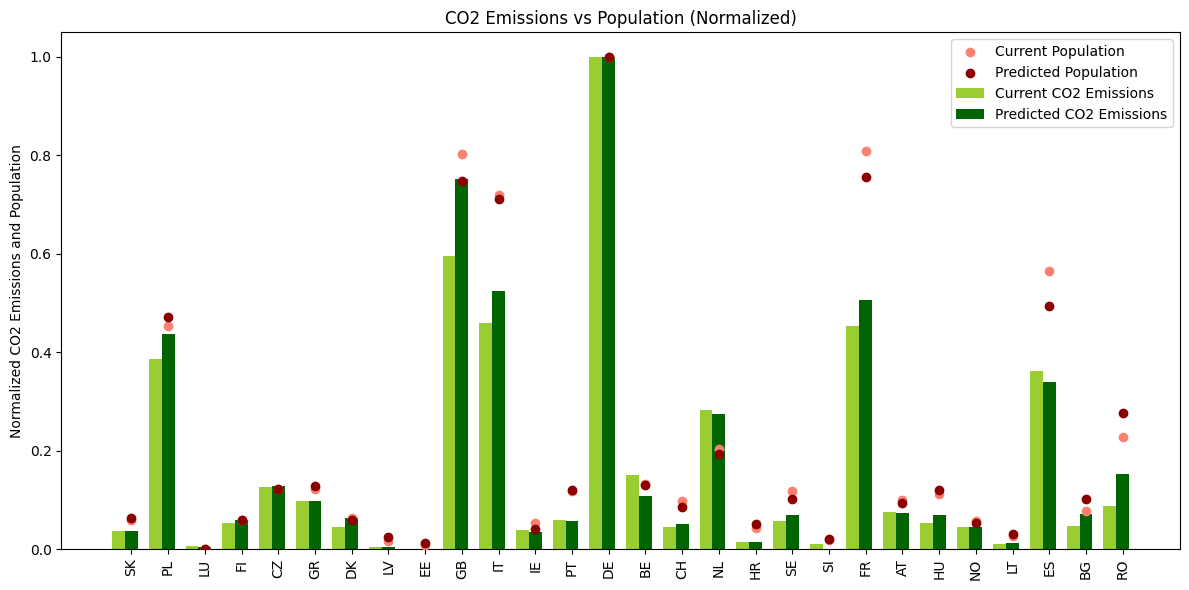

In [10]:
# Plot 2: Current CO2 Emissions vs. Predicted CO2 Emissions in correlation to Population

# Create a copy of the normalized data with both current and predicted population normalized for better scaling
data_normalized['Population_normalized'] = MinMaxScaler().fit_transform(data_normalized[['Population']])
data_normalized['Predicted_Population_normalized'] = MinMaxScaler().fit_transform(data_normalized[['predicted_Population']])

plt.figure(figsize=(12,6))
bar_width = 0.35

# Create a range for x-axis based on the number of countries
x_indexes = range(len(data_normalized['Country_Code']))

# Plot side-by-side bars for CO2 emissions
plt.bar([x - bar_width for x in x_indexes], data_normalized['avg_CO2_emissions'], width=bar_width, color='yellowgreen', label='Current CO2 Emissions')
plt.bar([x for x in x_indexes], data_normalized['predicted_avg_CO2_emissions'], width=bar_width, color='darkgreen', label='Predicted CO2 Emissions')

# Add normalized current and predicted population as scatter plots
plt.scatter(x_indexes, data_normalized['Population_normalized'], color='salmon', label='Current Population', zorder=5, marker='o')
plt.scatter(x_indexes, data_normalized['Predicted_Population_normalized'], color='darkred', label='Predicted Population', zorder=5, marker='o')

# Add labels and formatting
plt.xticks(ticks=x_indexes, labels=data_normalized['Country_Code'], rotation=90)
plt.title('CO2 Emissions vs Population (Normalized)')
plt.ylabel('Normalized CO2 Emissions and Population')
plt.legend()
plt.tight_layout()
plt.show()


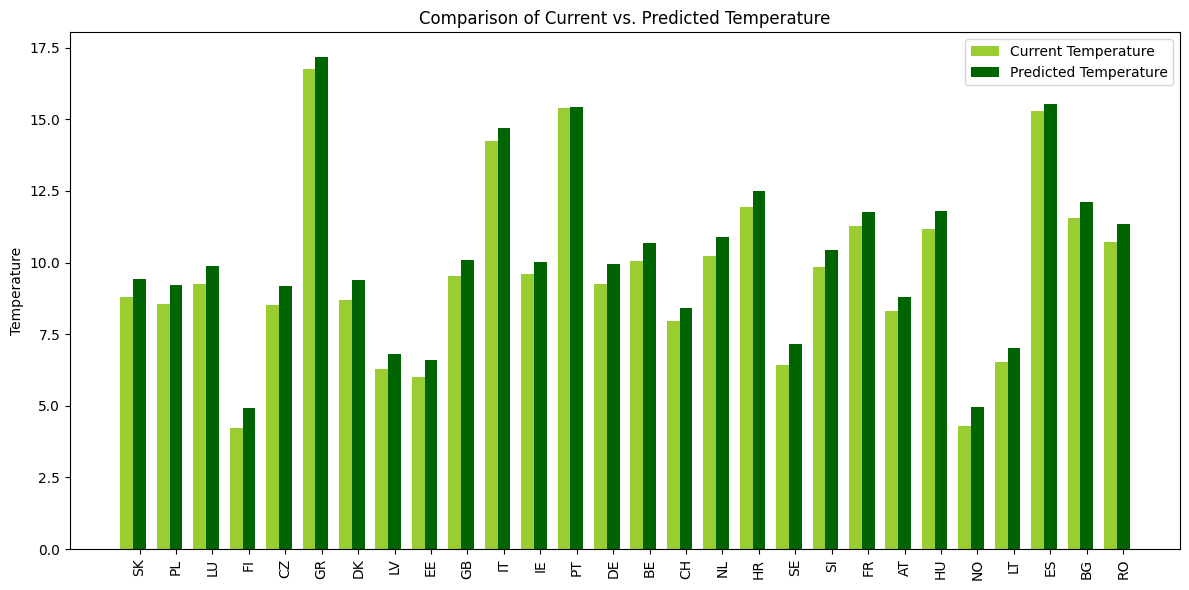

In [27]:
# Plot Current vs. Predicted Temperature
plt.figure(figsize=(12,6))
bar_width = 0.35

# Create a range for x-axis based on the number of countries
x_indexes = range(len(data_normalized['Country_Code']))

# Plot side-by-side bars for temperature
plt.bar([x - bar_width for x in x_indexes], data_normalized['average_temperature'], width=bar_width, color='yellowgreen', label='Current Temperature')
plt.bar([x for x in x_indexes], data_normalized['predicted_avg_temp'], width=bar_width, color='darkgreen', label='Predicted Temperature')

# Add labels and formatting
plt.xticks(ticks=x_indexes, labels=data_normalized['Country_Code'], rotation=90)
plt.title('Comparison of Current vs. Predicted Temperature')
plt.ylabel('Temperature')
plt.legend()
plt.tight_layout()
plt.show()

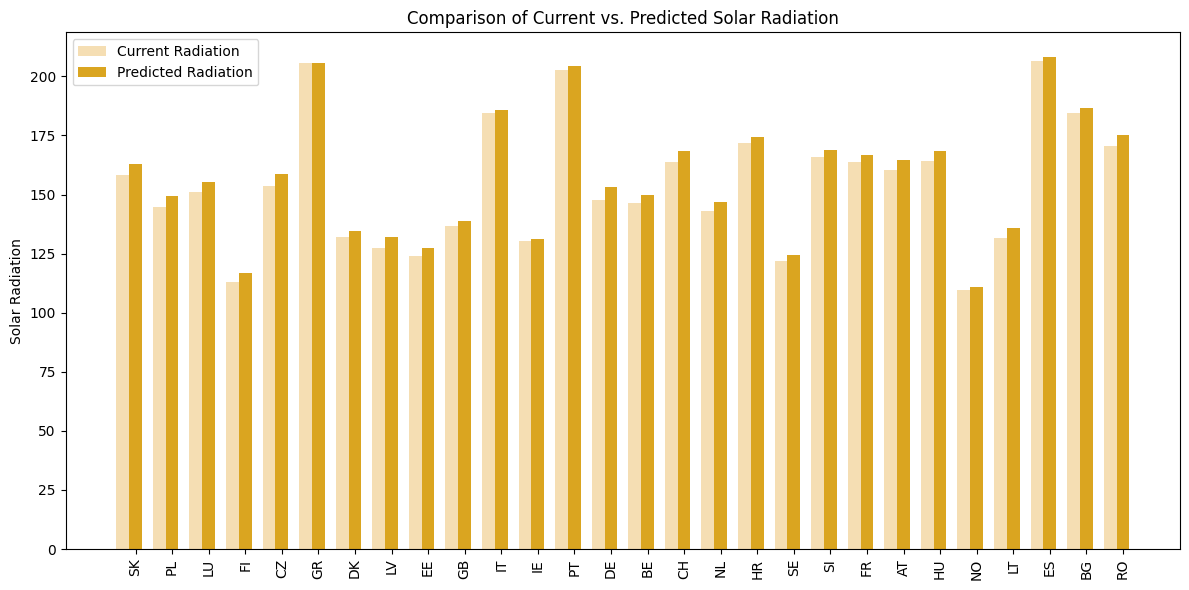

In [28]:
# Plot Current vs. Predicted Solar Radiation
plt.figure(figsize=(12,6))
bar_width = 0.35

# Create a range for x-axis based on the number of countries
x_indexes = range(len(data_normalized['Country_Code']))

# Plot side-by-side bars for solar radiation
plt.bar([x - bar_width for x in x_indexes], data_normalized['average_radiation'], width=bar_width, color='wheat', label='Current Radiation')
plt.bar([x for x in x_indexes], data_normalized['predicted_avg_radiation'], width=bar_width, color='goldenrod', label='Predicted Radiation')

# Add labels and formatting
plt.xticks(ticks=x_indexes, labels=data_normalized['Country_Code'], rotation=90)
plt.title('Comparison of Current vs. Predicted Solar Radiation')
plt.ylabel('Solar Radiation')
plt.legend()
plt.tight_layout()
plt.show()


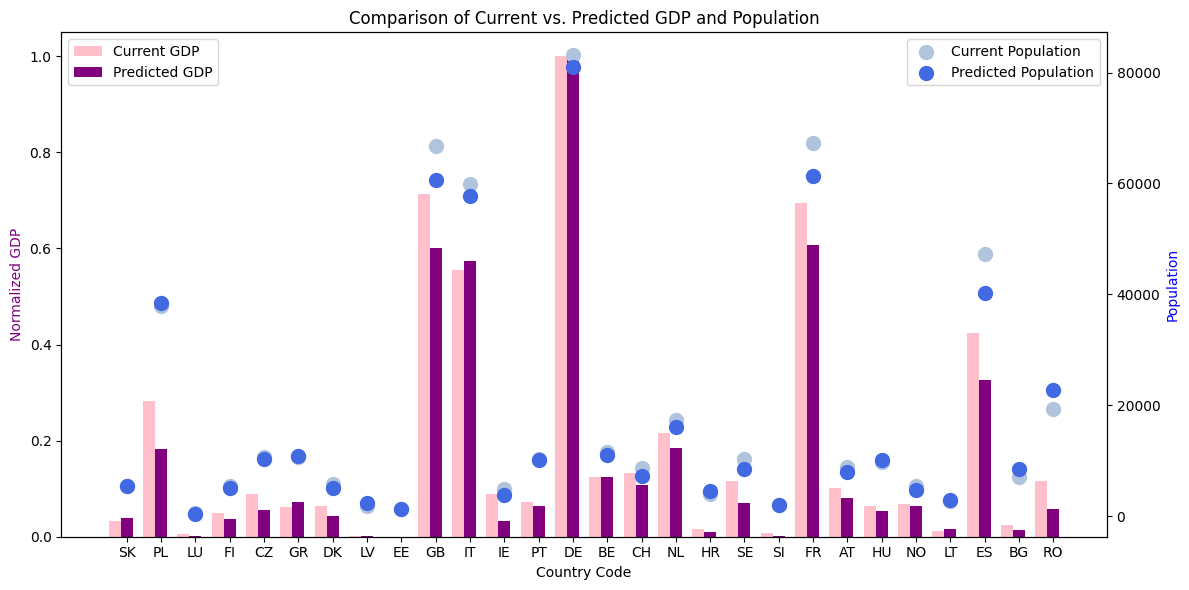

In [31]:
# Plot Current vs. Predicted GDP and Population (with larger dots for Population)
fig, ax1 = plt.subplots(figsize=(12,6))

bar_width = 0.35

# Create a range for x-axis based on the number of countries
x_indexes = range(len(data_normalized['Country_Code']))

# Plot side-by-side bars for GDP
ax1.bar([x - bar_width for x in x_indexes], data_normalized['GDP'], width=bar_width, color='pink', label='Current GDP')
ax1.bar([x for x in x_indexes], data_normalized['predicted_GDP'], width=bar_width, color='purple', label='Predicted GDP')

# Create a second y-axis for Population (with larger dots)
ax2 = ax1.twinx()
ax2.scatter(x_indexes, data_normalized['Population'], color='lightsteelblue', label='Current Population', s=100, marker='o')
ax2.scatter(x_indexes, data_normalized['predicted_Population'], color='royalblue', label='Predicted Population', s=100, marker='o')

# Add labels and formatting
ax1.set_xlabel('Country Code')
ax1.set_ylabel('Normalized GDP', color='purple')
ax2.set_ylabel('Population', color='blue')

plt.xticks(ticks=x_indexes, labels=data_normalized['Country_Code'], rotation=90)
ax1.set_title('Comparison of Current vs. Predicted GDP and Population')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()


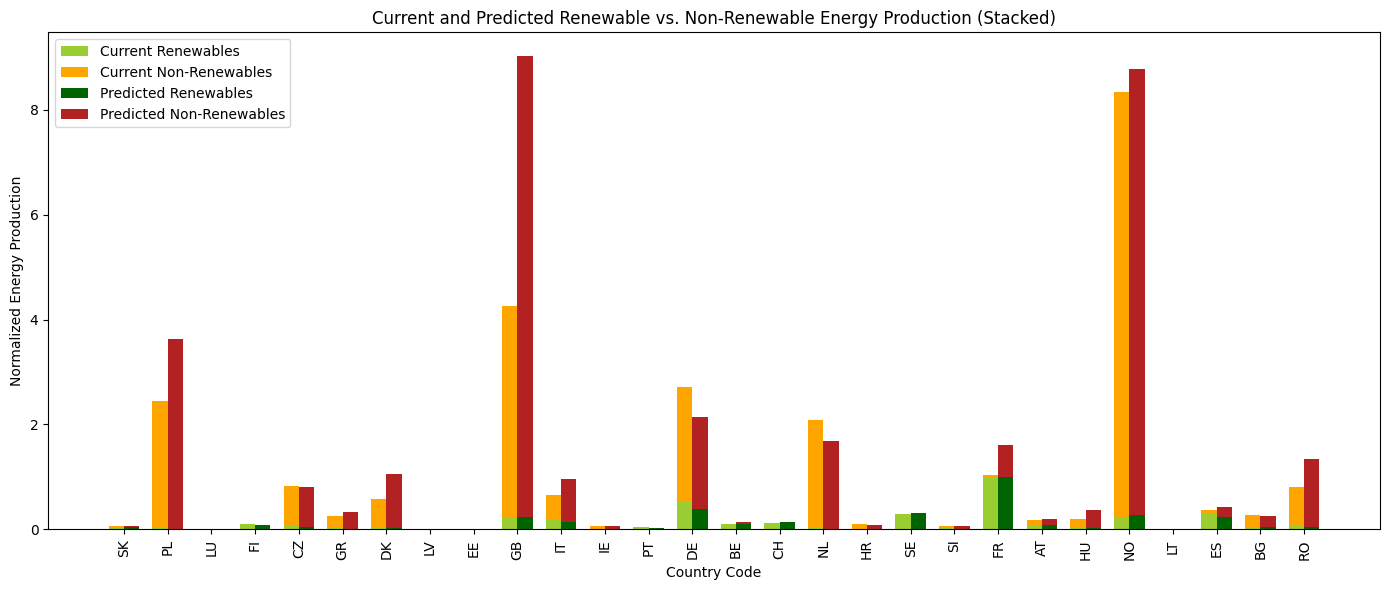

In [34]:
# Import numpy to resolve the error
import numpy as np

# Create combined stacked bar chart with separated bars for current and predicted values
plt.figure(figsize=(14, 6))

# Stacked bar chart for current energy production
bar_width = 0.35  # Width of the bars
country_codes = data_normalized['Country_Code']

# Positions of bars on x-axis
r1 = np.arange(len(country_codes))
r2 = [x + bar_width for x in r1]

# Plot current energy production
plt.bar(r1, data_normalized['avg_production_renewables'], width=bar_width, label='Current Renewables', color='yellowgreen')
plt.bar(r1, data_normalized['avg_production_non_renewables'], bottom=data_normalized['avg_production_renewables'], 
        width=bar_width, label='Current Non-Renewables', color='orange')

# Plot predicted energy production
plt.bar(r2, data_normalized['predicted_avg_production_renewables'], width=bar_width, label='Predicted Renewables', color='darkgreen')
plt.bar(r2, data_normalized['predicted_avg_production_non_renewables'], 
        bottom=data_normalized['predicted_avg_production_renewables'], width=bar_width, label='Predicted Non-Renewables', color='firebrick')

# Add labels and customize plot
plt.xticks([r + bar_width/2 for r in range(len(country_codes))], country_codes, rotation=90)
plt.xlabel('Country Code')
plt.ylabel('Normalized Energy Production')
plt.title('Current and Predicted Renewable vs. Non-Renewable Energy Production (Stacked)')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


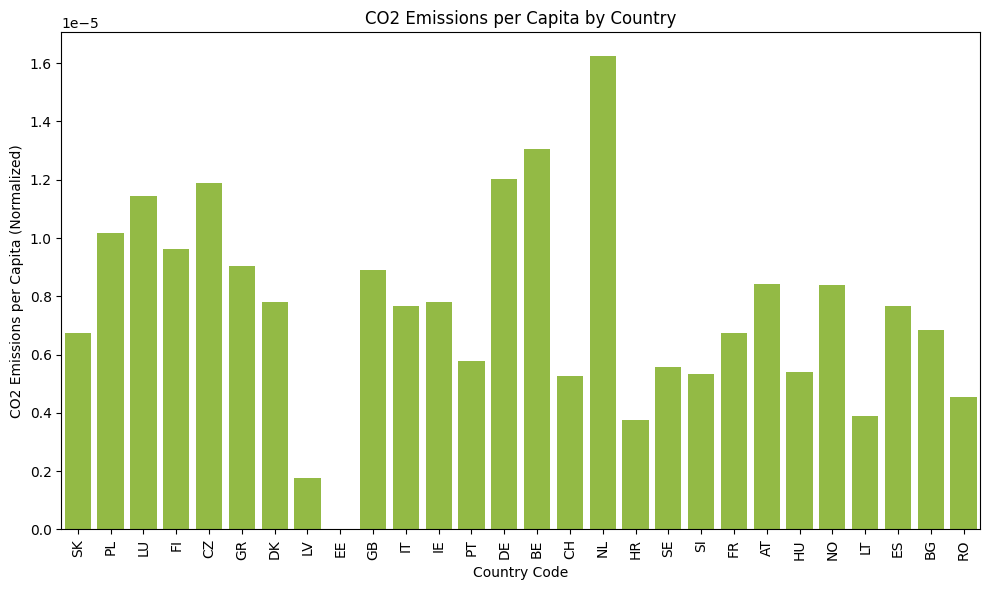

In [39]:
# CO2 emissions per capita
# Calculate CO2 emissions per capita
data_normalized['CO2_per_capita'] = data_normalized['avg_CO2_emissions'] / data_normalized['Population']

# Create a bar plot for CO2 emissions per capita
plt.figure(figsize=(10,6))

# Barplot for CO2 per capita
sns.barplot(x='Country_Code', y='CO2_per_capita', data=data_normalized, color='yellowgreen')

# Add labels and title
plt.xlabel('Country Code')
plt.ylabel('CO2 Emissions per Capita (Normalized)')
plt.title('CO2 Emissions per Capita by Country')
plt.xticks(rotation=90)

# Display plot
plt.tight_layout()
plt.show()
